<a href="https://colab.research.google.com/github/LanqingDu/AdvancedBusinessAnalytics/blob/main/NB_4_Image_Classification.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Image Classification Intro**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** Based on [Python manuals](https://docs.python.org/3/), [Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners](https://automatetheboringstuff.com/2e/), [TensorFlow](https://www.tensorflow.org/tutorials/quickstart/beginner) and other data Science online sources.  
> **Objective:** Introduction to image classificaiton and CNN.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

> **Disclaimer**: This notebook is prepared for instructional purposes. Some code blocks may intentionally contain errors to support the learning objectives.

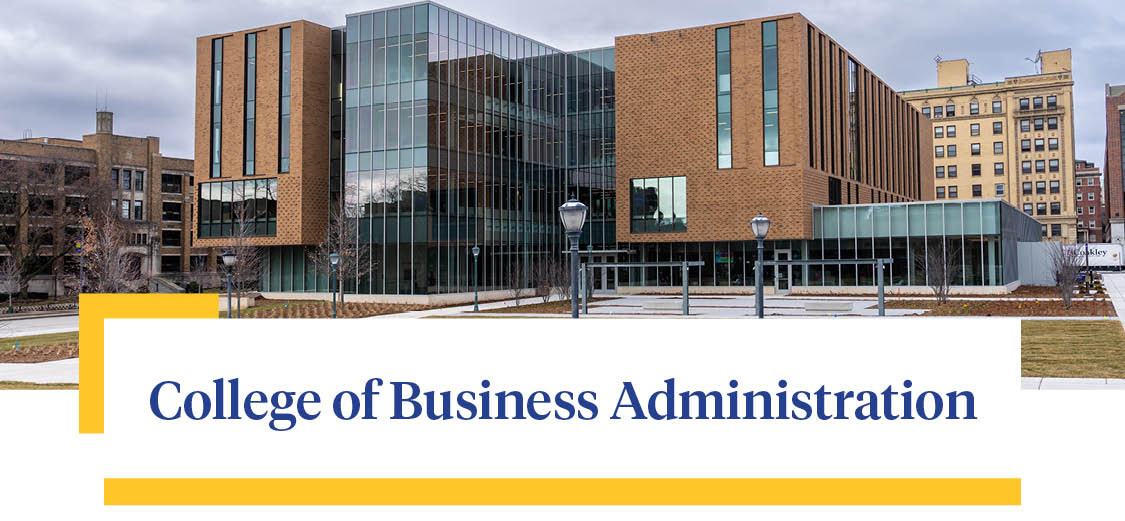
---

---

## [0. Agenda for Image Classification](#Intro)

## 1. PreparationDataset

- **Loading**: Importing image data from local paths, URLs, or cloud storage (e.g., Google Drive).
- **Normalization**: Scaling pixel values (typically to a range of $[0, 1]$ or $[-1, 1]$).

## 2. ModelLayer

- **Stacking**: Building the architecture using dense layers and dropout.
- **Hyperparameter Tuning**: Selecting the optimal learning rate, batch size, and number of epochs.- **Compilation**: Configuring the model with an optimizer (e.g., Adam) and a loss function (e.g., Categorical Crossentropy).

## 3. Pretrained Model
- **Transfer Learning**: Utilizing "off-the-shelf" weights from models like ResNet, VGG16, or MobileNet.
- **Feature Extraction**: Freezing the convolutional base to retain generic spatial features while training a custom head.
- **Fine-Tuning**: Unfreezing the top layers of the frozen base to allow the model to "specialize" on your specific dataset.

---

## [1. Preparation](#S1)

- **Library Inclusion**: Importing essential frameworks including tensorflow, numpy, and matplotlib.- **TensorBoard Setup**: Initializing the magic command %load_ext tensorboard and creating a log directory for visualization.
- **Data Acquisition**: Loading the dataset (e.g., CIFAR-10) and splitting it into distinct Training and Testing sets.
- **Image Preprocessing**:
  - Normalization: Dividing pixel values by 255 to scale data from $[0, 255]$ to $[0, 1]$.
  - Why 255? Neural networks converge faster when input features are on a similar small scale, preventing gradients from exploding.
  - Data Exploration: Inspecting the shape of the tensors and visualizing sample images to understand class distribution.

In [1]:
# step 0: include libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
%load_ext tensorboard

In [ ]:
# step 1: Setting up log folders for TensorBoard.

# Clear any logs from previous runs
!rm -rf ./logs/

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# step 2: Training and testing dataset


# TODO: load the data

(x_train, <...>), (x_test, <...>) = tf.keras.datasets.mnist.load_data()

In [ ]:
# step 3: image data preprocessing

# TODO: normalize input to range [0,1]

x_train = x_train / <...>
x_test =  x_test / <...>

In [ ]:
# step 4: check the shapes

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# step 5: data exploration - training data



# TODO: show to first image in the training dataset

sample_image = x_train<...>
print(sample_image.shape)

plt.imshow(sample_image, cmap='gray')
plt.show()

In [ ]:
# step 7: data exploration - training label


# TODO: print the label of the first image in the training dataset

sample_label = <...>
print(sample_label)

---

## [2. Model](#S1)

- **Neural Network Layers**: Constructing the backbone using Input, Conv2D, MaxPooling2D, and Dense layers.

- **Dropout Regularization**:

  - What is Dropout? A technique where randomly selected neurons are ignored during training to prevent overfitting.

  - It forces the network to learn more robust, redundant features rather than relying on specific paths.

- **Activation Functions**: Implementing non-linearity to allow the model to learn complex patterns.

  - ReLU (Rectified Linear Unit): The standard for hidden layers; outputs 0 for negative values and the input for positive values.
    - we can call those function to show how activation functions is working `layer = tf.keras.layers.ReLU()`
    `layer([-3.0, -1.0, 0.0, 2.0])`

  - Leaky ReLU: Similar to ReLU but allows a small, non-zero gradient when the input is negative.

  - Sigmoid / Tanh: Often used in binary classification or older architectures.

  - Softmax: Typically used in the final layer for multi-class probability distributions.

    - The Softmax Dilemma about numerical stability: We often avoid adding Softmax as a layer in the model definition. (see https://www.tensorflow.org/api_docs/python/tf/keras/losses)

    - Instead, we output raw Logits and handle the activation within the loss function to prevent floating-point errors.

- **Loss Configuration** (from_logits):

  - `from_logits=False` (Default): Assumes the model output is already a probability distribution (e.g., Softmax was used).

  - `from_logits=True`: Informs the loss function that outputs are raw values (Logits), allowing for more mathematically stable internal calculations.

- **Training with Callbacks**: - Integrating `tensorboard_callback` during the `model.fit()` process to log real-time metrics.

In [ ]:
# step 8: del model from memory

try:
  del(model)
except:
  pass

In [ ]:
# step 9: NN with dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="flatten_input" ),
    tf.keras.layers.Dense(128, activation='relu', name="dense_hidden_128" ),

    # TODO1: add a dropout layer to drop 20% of neurons
    #       20% will be randomly set to zero during each training step
    # TODO2: name this layer as dropout_20
    tf.keras.layers.Dropout(<...>, name=<...>),
    tf.keras.layers.Dense(10, name="dense_output_10")
])

# # equivalent to
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10)
# ])


# # alternative model with a different activation function
# model2 = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(0.01)),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10)
# ])

# # alternative model with a different activation function
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28), name="flatten_input"),
#     tf.keras.layers.Dense(128, name="dense_hidden_128"), # if want to see the "raw" output of a layer
#     tf.keras.layers.LeakyReLU(alpha=0.01, name="leaky_relu_01"),
#     tf.keras.layers.Dropout(0.2, name="dropout_20"),
#     tf.keras.layers.Dense(10, name="dense_output_10")], name="mnist_leakyrelu_model")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# step 10: model info

# TODO: plot the model info
tf.keras.utils.plot_model(<...>)

In [ ]:
# step 11: model info

# TODO: call the summary method to show the params size
model.<...>

In [ ]:
# step 12: loss function alternative approach

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# TODO: pass the predefined loss function into model.compile
model.compile(optimizer='adam',
              loss= <...>,
              metrics=['accuracy'])

In [ ]:
# step 13: model training

# specify `callbacks` and pass `tensorboard_callback` that we declared earlier.

history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_split=0.2,
                    callbacks=[tensorboard_callback])

In [ ]:
# step 14: model training (plot)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# step 15: model testing


# TODO: test model using testing dataset
model.evaluate(<...>)

In [ ]:
# step 16: prediction on the testing data


# TODO: make prediction of the first instance in the testing dataset

logits = model(<...>) # equivalent to model.predict(x_test[0:1])
logits

In [ ]:
# step 17: softmax prediction

# TODO: Classification task

tf.sigmoid(<...>)

In [ ]:
# step 18: visualizing the test instance

# TODO: visualize the first instance in the testing dataset

plt.imshow(<...>, cmap='gray')
plt.show()

In [ ]:
# step 19: Showing the TensorBoard

%tensorboard --logdir logs

In [ ]:
# step 19: save the model

model.save('my_model.keras')

# # single file, older Keras format
# # model.save('my_model.h5')

In [ ]:
# step 20: web browser format (json)

!pip install tensorflowjs

import tensorflowjs as tfjs
model.save('my_model.h5')
!tensorflowjs_converter --input_format keras my_model.h5 tfjs_target_dir

---

## [3. Pretrained Model](#S2)

- **TensorFlow Hub** Integration:

  - Accessing `tfhub.dev` to load state-of-the-art models (e.g., MobileNet, Inception) as reusable "modules."

  Utilizing `hub.KerasLayer` to wrap a pretrained model as a standard Keras layer.

- **Pretrained Architectures** (Slim/Research):

  - Exploring the TensorFlow Models repository for advanced architectures like ResNet, VGG, and NASNet.

  - Understanding how models trained on massive datasets like ImageNet provide a powerful starting point for custom tasks.

- **Transfer Learning Workflow**:

  - Freezing Weights: Setting trainable=False to preserve the learned features of the base model.

  - Global Average Pooling: Reducing high-dimensional feature maps into a 1D vector for classification.

  - Custom Head: Adding new Dense layers to map the extracted features to your specific number of classes.

In [ ]:
# step 21: pretrained model 1

import tensorflow_hub as hub

inception_model_1 = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001])

In [ ]:
# step 22: get image net lables for class interpretation

labels = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', header=None)

labels

,0
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark
...,...
996,earthstar
997,hen-of-the-woods
998,bolete
999,ear


In [ ]:
# step 23: download image data using wget

!wget https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2KL6JYQYH4I6REYMIWBYVUGXPI.jpg

--2026-02-13 02:02:01--  https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2KL6JYQYH4I6REYMIWBYVUGXPI.jpg
Resolving arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)... 16.182.72.57, 3.5.27.160, 16.182.101.233, ...
Connecting to arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com (arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com)|16.182.72.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6038878 (5.8M) [image/jpeg]
Saving to: ‘2KL6JYQYH4I6REYMIWBYVUGXPI.jpg’

2KL6JYQYH4I6REYMIWB 100%[===================>]   5.76M  22.1MB/s    in 0.3s    

2026-02-13 02:02:02 (22.1 MB/s) - ‘2KL6JYQYH4I6REYMIWBYVUGXPI.jpg’ saved [6038878/6038878]



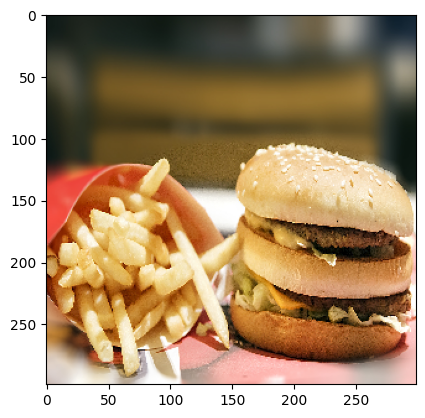

In [ ]:
# step 24: load & preprocessing the image data

img_1 = tf.keras.preprocessing.image.load_img('2KL6JYQYH4I6REYMIWBYVUGXPI.jpg', target_size=(299, 299))
imga_1 = tf.keras.preprocessing.image.img_to_array(img_1) / 255.0

# image_array.shape
plt.imshow(imga_1)

In [ ]:
# step 25: process the image data for prediction

# image_array is a (299, 299, 3) shaped array. However, image classifier models typically require an extra axis or dimension because they typically receive multiple images as inputs not just one. Therefore, we have to convert the array to a (1, 299, 299, 3) array

imga_1_test = imga_1[tf.newaxis, ...]
output = inception_model_1(imga_1_test)

np.argsort(-1*output)[0] # Sorting the output from highest to lowest
labels.iloc[np.argsort(-1*output)[0]] # print the corresponding label

,0
934,cheeseburger
932,bagel
949,Granny Smith
935,hotdog
944,cucumber
...,...
685,ocarina
755,radio
2,goldfish
120,rock crab


In [ ]:
# step 26: try another img data

!wget https://www.seasonsandsuppers.ca/wp-content/uploads/2023/10/pumpkin-muffins-1200-60.jpg -O pumpkin_muffins.jpg

img_new = tf.keras.preprocessing.image.load_img('pumpkin_muffins.jpg', target_size=(299, 299))
image_array = tf.keras.preprocessing.image.img_to_array(img_new) / 255.0

image_array_new = image_array[tf.newaxis, ...]
output = inception_model_1(image_array_new)
labels.iloc[np.argsort(-1*output)[0]]

--2026-02-13 02:29:31--  https://www.seasonsandsuppers.ca/wp-content/uploads/2023/10/pumpkin-muffins-1200-60.jpg
Resolving www.seasonsandsuppers.ca (www.seasonsandsuppers.ca)... 172.67.69.110, 104.26.1.106, 104.26.0.106, ...
Connecting to www.seasonsandsuppers.ca (www.seasonsandsuppers.ca)|172.67.69.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74661 (73K) [image/jpeg]
Saving to: ‘pumpkin_muffins.jpg’

pumpkin_muffins.jpg 100%[===================>]  72.91K  --.-KB/s    in 0.01s   

2026-02-13 02:29:31 (6.98 MB/s) - ‘pumpkin_muffins.jpg’ saved [74661/74661]



,0
416,bakery
931,French loaf
929,ice cream
932,bagel
869,tray
...,...
910,wok
637,mailbag
843,swimming trunks
681,nipple


In [ ]:
# step 27: corresponding output

output = inception_model_1(image_array_new)
print(output)

tf.Tensor(
[[ 0.03582311 -0.9472233  -0.64853543 ...  1.5656099   0.27110913
  -0.4724182 ]], shape=(1, 1001), dtype=float32)


In [ ]:
# !wget https://ih1.redbubble.net/image.3326595635.3033/bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg -O muffin_dog.jpg

In [ ]:
# step 28: pretrained model 2

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load pretrained model
model = ResNet50(weights='imagenet')

# Load and preprocess image
img = image.load_img('pumpkin_muffins.jpg', target_size=(224, 224))
x = image.img_to_array(img) # Changed from image_array to img
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
preds = model.predict(x)

# Decode top-5 predictions
print("Predictions:", decode_predictions(preds, top=5)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions: [('n02776631', 'bakery', np.float32(0.86276954)), ('n07693725', 'bagel', np.float32(0.026491314)), ('n07697313', 'cheeseburger', np.float32(0.025801498)), ('n07684084', 'French_loaf', np.float32(0.023887942)), ('n07579787', 'plate', np.float32(0.011846089))]
